<a id=0></a>
# 6.Matrix Plot & Display Settings

---
### [1.SearbornのデータセットからDataFrameを作成 ](#1)
### [2.Numpyのwhere(), select()を用いたレコード抽出と置換](#2)
### [3.Matrix Plot ](#3)
### [4.パイチャートと画像の保存](#4)
### [5.グラフの表示調整](#5)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
<a id=1></a>
[Topへ](#0)

---
## 1. SearbornのデータセットからDataFrameを作成

* データセット('iris')を読み込む
* PandasのCategory型
---

データセット('iris')を読み込む

In [2]:
# sns.get_dataset_names()

In [3]:
df = sns.load_dataset('iris')   #アヤメ属
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


<p>
    <a href="https://www.kaggle.com/datasets/uciml/iris" target="_blank" rel="noreferrer noopener">
        Kaggle Dataset Iris のページへ
    </a>
</p>

    sepal     : がく片
    petal     : 花弁

In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# speciesの確認
df['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

PandasのCategory型

In [7]:
# category型に変換
df['species'].astype('category')

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [8]:
# category型でリストを作成
pd.Categorical(df['species'])

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [9]:
# np.array([1, 2, 3]).astype('category')
# Numpyの型ではない

In [10]:
# 順序を固定できる
pd.Categorical(df['species'], ordered=True, categories=['versicolor', 'virginica', 'setosa'])

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['versicolor' < 'virginica' < 'setosa']

In [11]:
df['cat'] = pd.Categorical(df['species'], ordered=True, categories=['versicolor', 'virginica', 'setosa'])
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,cat
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa


In [12]:
# カテゴリーの取得
df['cat'].cat.categories

Index(['versicolor', 'virginica', 'setosa'], dtype='object')

In [13]:
# コードの取得
df['cat'].cat.codes

# categoryという存在を少し詳しく知っておくための補講でした

0      2
1      2
2      2
3      2
4      2
      ..
145    1
146    1
147    1
148    1
149    1
Length: 150, dtype: int8

In [14]:
df.drop('cat', axis=1, inplace=True)
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


---
<a id=2></a>
[Topへ](#0)

---
## 2. Numpyのwhere(), select()を用いたレコード抽出と置換

* np.where(condition, True-value, False-value)
* np.select(conditions, values)  
---

np.where(condition, True-value, False-value)

In [15]:
np.where(df['petal_width'] > 1.3)

(array([ 50,  51,  52,  54,  56,  59,  61,  63,  65,  66,  68,  70,  72,
         75,  76,  77,  78,  83,  84,  85,  86,  91, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149], dtype=int64),)

In [16]:
# 以下でも同様の結果
df[df['petal_width'] > 1.3].index

Int64Index([ 50,  51,  52,  54,  56,  59,  61,  63,  65,  66,  68,  70,  72,
             75,  76,  77,  78,  83,  84,  85,  86,  91, 100, 101, 102, 103,
            104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
            117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
            130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
            143, 144, 145, 146, 147, 148, 149],
           dtype='int64')

In [17]:
np.where(df['petal_width'] > 1.3, 'wide', 'narrow')

array(['narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'wide', 'wide', 'wide', 'narrow', 'wide',
       'narrow', 'wide', 'narrow', 'narrow', 'wide', 'narrow', 'wide',
       'narrow', 'wide', 'narrow', 'wide', 'wide', 'narrow', 'wide',
       'narrow', 'wide', 'narrow', 'wide', 'narrow', 'narrow', 'wide',
       'wide', 'wide', 'wide', 'narrow', 'narrow', 'narrow', 'narrow',
       'wide', 'wide', 'wide', 'wide', 'narrow', 'narrow', 'narrow',
       'narrow', 'wide', 'narrow', 'narrow',

In [18]:
# 以下でも同様の結果
# ではなぜ？　forは処理に時間が掛かり、Numpyは高速
['wide' if df.loc[i, 'petal_width'] > 1.3 else 'narrow' for i in df.index]
# li = []
# for i in df.index:
#     if df.loc[i, 'petal_width'] > 1.3:
#         li.append('wide')
#     else:
#         li.append('narrow')
# li

['narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'wide',
 'wide',
 'wide',
 'narrow',
 'wide',
 'narrow',
 'wide',
 'narrow',
 'narrow',
 'wide',
 'narrow',
 'wide',
 'narrow',
 'wide',
 'narrow',
 'wide',
 'wide',
 'narrow',
 'wide',
 'narrow',
 'wide',
 'narrow',
 'wide',
 'narrow',
 'narrow',
 'wide',
 'wide',
 'wide',
 'wide',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'wide',
 'wide',
 'wide',
 'wide',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'wide',
 'narrow',
 'narrow',
 'narrow',

np.select(conditions, values)

In [19]:
# 複数条件の場合
conditions = [df['petal_width'] < 1, (1 <= df['petal_width']) & (df['petal_width'] < 2), 2 <= df['petal_width']]
values = ['narrow', 'medium', 'wide']

In [20]:
np.select(conditions, values)

array(['narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medi

In [21]:
df['pw_cat'] = np.select(conditions, values)
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,pw_cat
0,5.1,3.5,1.4,0.2,setosa,narrow
1,4.9,3.0,1.4,0.2,setosa,narrow
2,4.7,3.2,1.3,0.2,setosa,narrow


In [22]:
# 後のプロットで使うため、ランダムな分類を設定しておく
np.random.seed(17)
arr = ['red', 'green', 'blue']
df['color'] = np.random.choice(arr, len(df))
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pw_cat,color
0,5.1,3.5,1.4,0.2,setosa,narrow,green
1,4.9,3.0,1.4,0.2,setosa,narrow,blue
2,4.7,3.2,1.3,0.2,setosa,narrow,blue
3,4.6,3.1,1.5,0.2,setosa,narrow,green
4,5.0,3.6,1.4,0.2,setosa,narrow,red


---
<a id=3></a>
[Topへ](#0)

---
## 3. Matrix Plot

* Seabornテーマの設定
* ヒートマップ : 相関関係を表示
    * **sns.heatmap()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html" target="_blank" rel="noreferrer noopener">
            Seaborn.heatmap のページへ
        </a>
    </p>
    

* クラスターマップ : ヒートマップを類似性の高い組み合わせに並び変えて表示
    * **sns.clustermap()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.clustermap.html" target="_blank" rel="noreferrer noopener">
            Seaborn.clustermap のページへ
        </a>
    </p>


* ペアグリッド : 自由度の高いペアプロット
    * **sns.PairGrid()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.PairGrid.html?highlight=pairgrid#seaborn.PairGrid" target="_blank" rel="noreferrer noopener">
            Seaborn.pairgrid のページへ
        </a>
    </p>


* Facetグリッド : 自由度の高い、行と列にクラス分けができるグリッド
    * **sns.FacetGrid()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.FacetGrid.html?highlight=facetgrid#seaborn.FacetGrid" target="_blank" rel="noreferrer noopener">
            Seaborn.facetgrid のページへ
        </a>
    </p>

---

Seabornテーマの設定

In [23]:
sns.set_theme(context='talk', style='darkgrid', font='MS GOTHIC')
# google colaboratotyの場合はfontの設定は不要。japanizematplotlibを利用してください

ヒートマップ

In [24]:
df_corr = df.corr()
df_corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


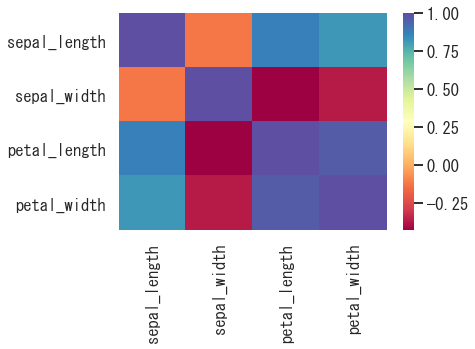

In [25]:
sns.heatmap(data=df_corr, cmap='Spectral')
plt.show()

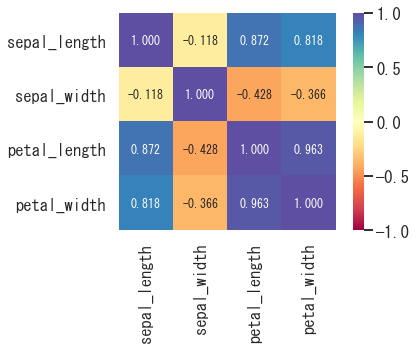

In [39]:
sns.heatmap(data=df_corr, annot=True, annot_kws={'size':12}, fmt='.3f', cmap='Spectral', vmin=-1, square=True, linewidth=1)
plt.show()

クラスターマップ  
※ 属性が似た

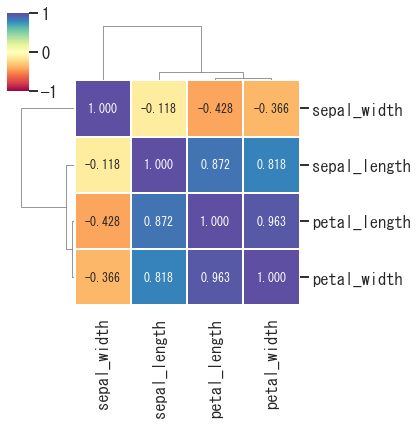

In [27]:
# 表現は多少複雑になるが、情報が整理されるため、heatmapではなくこちらを選択してもよい
sns.clustermap(data=df_corr, annot=True, annot_kws={'size':12}, fmt='.3f', cmap='Spectral', vmin=-1, linewidth=1, figsize=(6, 6))
plt.show()

ペアグリッド  
※ グリッド形式で2値の組み合わせ毎の関係を表す

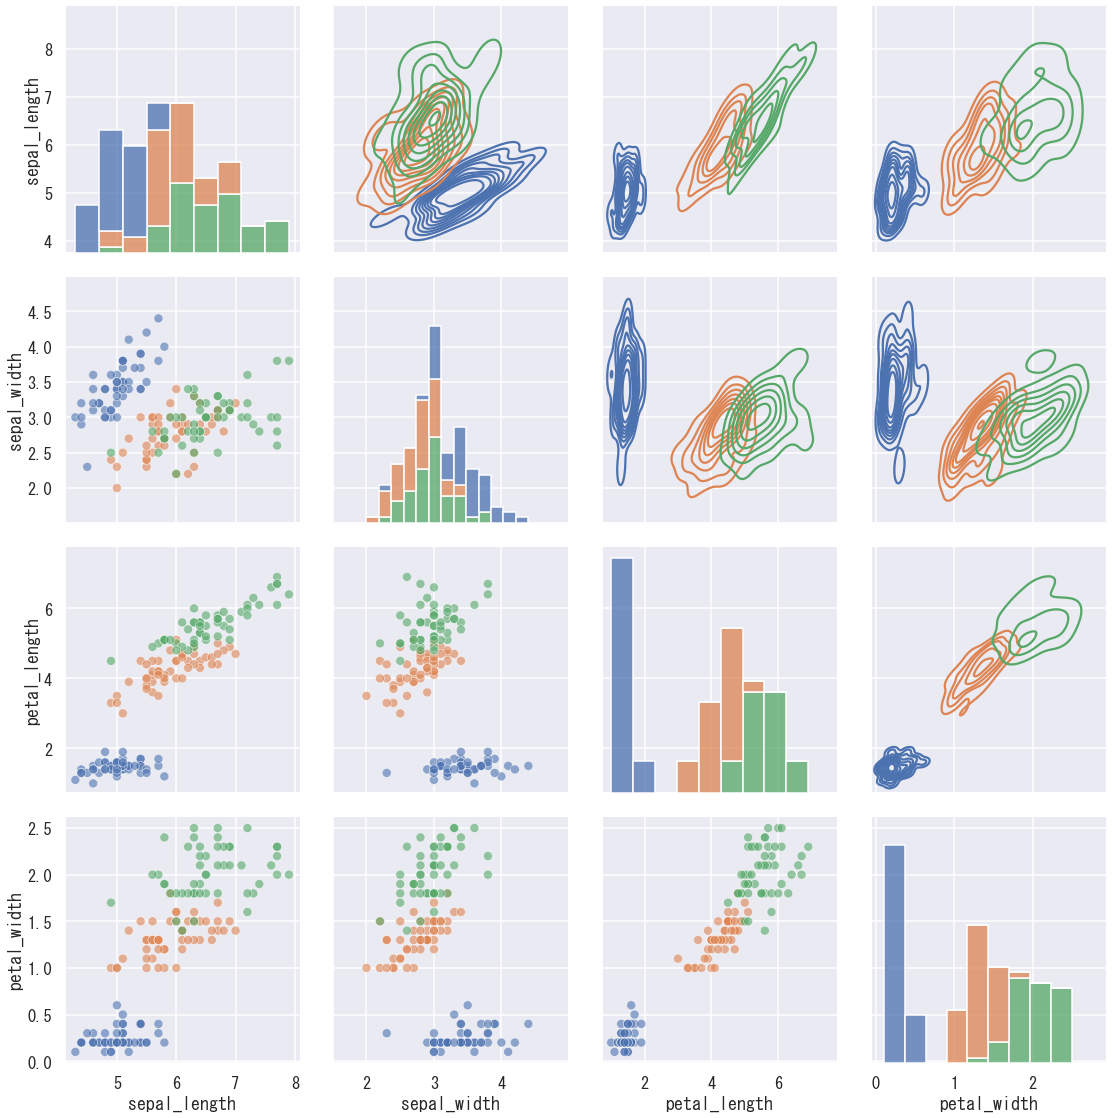

In [28]:
# 変数を使って記述
# 対角線上、その上、下で種類を変更できる
# varsに使用したいカラム名を入力
g = sns.PairGrid(data=df, hue='species', vars=df.select_dtypes(float).columns, height=4)
g.map_diag(sns.histplot, multiple='stack')
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot, alpha=0.6)
plt.show()

In [29]:
length = ['petal_length', 'sepal_length']
width = ['petal_width', 'petal_width']

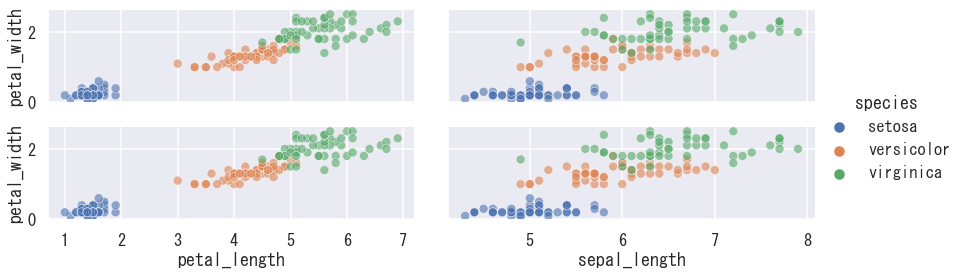

In [30]:
# x, y に別のカラムを使用できる
g = sns.PairGrid(data=df, hue='species', x_vars=length, y_vars=width, height=2, aspect=3)
g.map(sns.scatterplot, alpha=0.6)
g.add_legend()
plt.show()

Facetグリッド  
※ row と col にクラスで分類しそれぞれにプロット

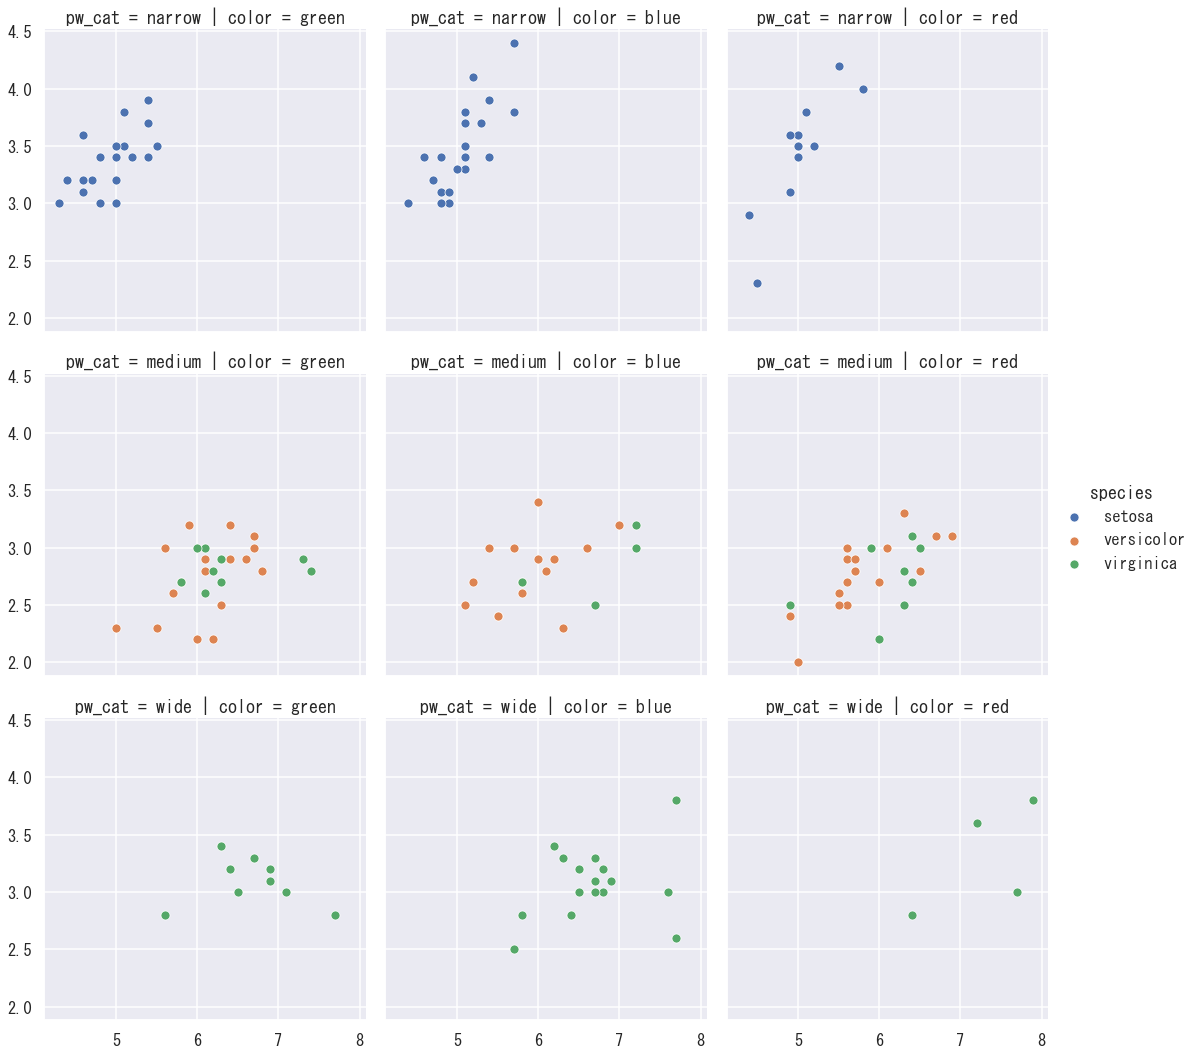

In [31]:
# row, columnにカテゴリカルな変数を指定して利用
g = sns.FacetGrid(data=df, row='pw_cat', col='color', height=5, hue='species')
# g.map_dataframe(sns.histplot, x='sepal_length')
g.map_dataframe(sns.scatterplot, x='sepal_length', y='sepal_width')
g.add_legend()
plt.show()

# PairGrid, FacetGridはSeabornの他のプロットではどうしても対応しきれないという場合、高度な表現をしたい場合に使うもの。最初から知って、使うものではない。

---
<a id=4></a>
[Topへ](#0)

---
## 4. パイチャートと画像の保存

In [32]:
data = df['species'].value_counts()
labels = data.index
labels

Index(['versicolor', 'setosa', 'virginica'], dtype='object')

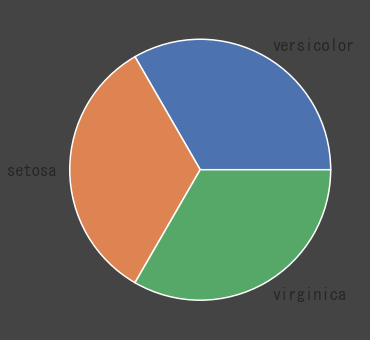

In [33]:
plt.figure(figsize=(8, 6), facecolor='#444')
plt.pie(data, labels=labels)
plt.show()

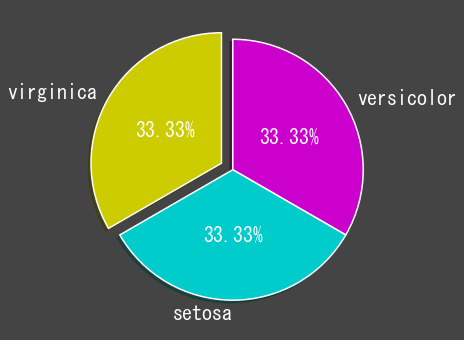

In [34]:
plt.figure(figsize=(8, 6), facecolor='#444')
plt.pie(data, labels=labels, autopct='%.2f%%', textprops={'color':'#fff', 'size':20}, colors=['#c0c', '#0cc', '#cc0'], startangle=90, counterclock=False, explode=[0, 0, 0.1], shadow=True, pctdistance=0.5)
plt.show()

画像の保存

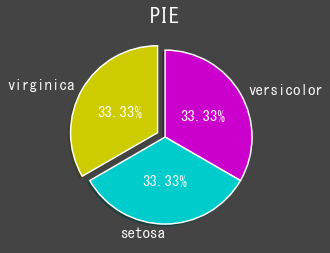

In [35]:
plt.figure(figsize=(6, 4), facecolor='#444')
plt.pie(data, labels=labels, autopct='%.2f%%', textprops={'color':'#fff', 'size':15}, colors=['#c0c', '#0cc', '#cc0'], startangle=90, counterclock=False, explode=[0, 0, 0.1], shadow=True, pctdistance=0.5)
plt.title('PIE', size=20, color='#fff')
plt.savefig('pie.png', dpi=100)   # transparent=True
plt.show()

---
<a id=5></a>
[Topへ](#0)

---
## 5. グラフの表示調整

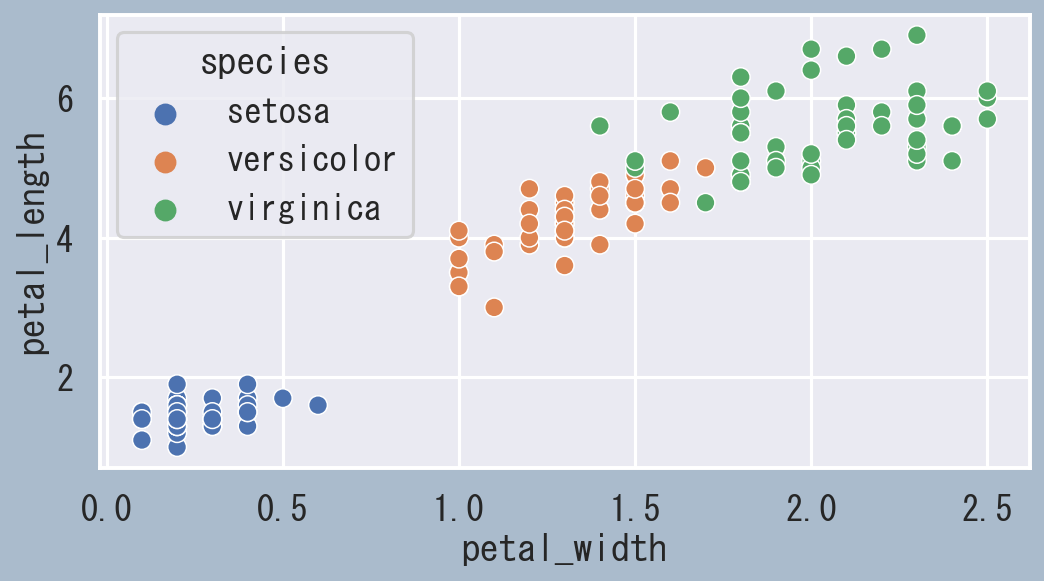

In [36]:
plt.figure(figsize=(8, 4), facecolor='#abc', dpi=150)
sns.scatterplot(data=df, x='petal_width', y='petal_length', hue='species')
plt.show()

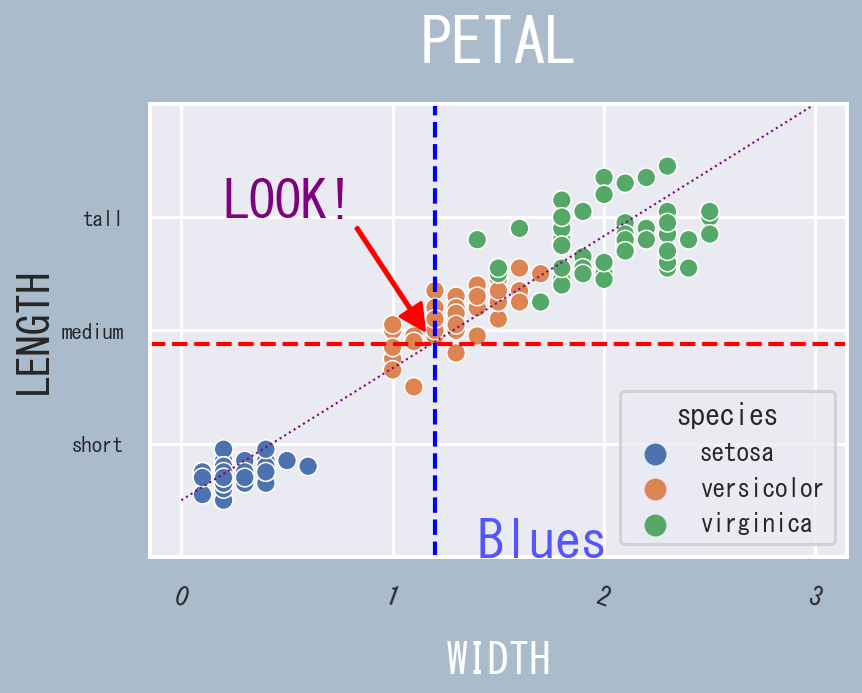

In [37]:
plt.figure(figsize=(6,4), facecolor='#abc', dpi=150)
sns.scatterplot(data=df, x='petal_width', y='petal_length', hue='species')

plt.title('PETAL', fontsize=30, color='#fff', pad=20)
# ラベル
plt.xlabel('WIDTH', fontsize=20, color='#fff', labelpad=15)   # labelpad
plt.ylabel('LENGTH', fontsize=20)
# 目盛り
plt.yticks(ticks=[2, 4, 6], labels=['short', 'medium', 'tall'], size=10)
plt.ylim(0, 8)

plt.xticks(rotation=-20, size=12)
# レジェンド
plt.legend(loc='lower right', title='species', fontsize=12, title_fontsize=14)

plt.plot([0, 3], [1, 8],color='purple', linewidth=1, linestyle=':')
# [X1, X2, ...], [Y1, Y2, ...]

# x軸に水平と垂直
plt.axhline(df['petal_length'].mean(), color='red', linewidth=2, linestyle='--')
plt.axvline(df['petal_width'].mean(), color='blue', linewidth=2, linestyle='--')

# xyは矢印の開始位置、xytextはテキストの開始位置。矢印の末端は自動調整される
plt.annotate('LOOK!', xy=(1.15, 4), xytext=(0.2, 6), color='purple', size=25, arrowprops={'color':'red', 'width':1})
# テキスト
plt.text(1.4, 0, 'Blues', size=25, c='#55f')

plt.show()

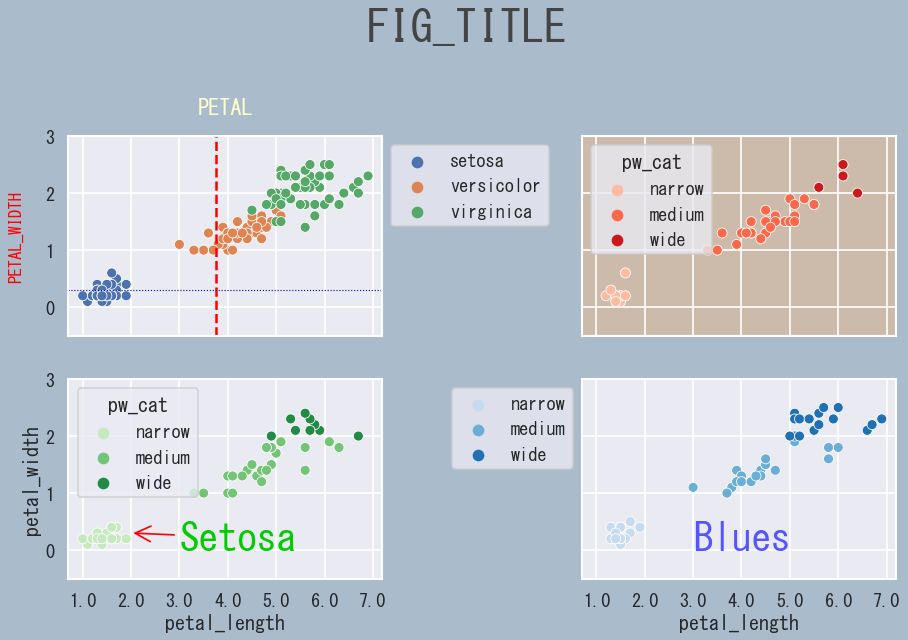

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), facecolor="#abc", dpi=80, tight_layout=True, sharey=True, sharex=True)
# sharex, shareyで軸と目盛りは統一される

sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', ax=axes[0, 0])
sns.scatterplot(data=df[df['color'] == 'red'], x='petal_length', y='petal_width', hue='pw_cat', ax=axes[0, 1], palette='Reds')
sns.scatterplot(data=df[df['color'] == 'green'], x='petal_length', y='petal_width', hue='pw_cat', ax=axes[1, 0], palette='Greens')
sns.scatterplot(data=df[df['color'] == 'blue'], x='petal_length', y='petal_width', hue='pw_cat', ax=axes[1, 1], palette='Blues')
# 全体のタイトル
fig.suptitle('FIG_TITLE', size=40, color='#444', y=1.01)
# yの初期値は0.98

# サブプロット（Axes）の間隔を整える
fig.subplots_adjust(wspace=5, hspace=3)
# サブプロットのタイトル
axes[0, 0].set_title('PETAL', size=20, pad=20, color='#ffc')
# Yラベル
axes[0, 0].set_ylabel('PETAL_WIDTH', labelpad=20, fontsize=15, color='#f00')
# 目盛りの表示範囲
axes[0, 0].set_ylim(-0.5, 3)
# 目盛りと目盛りラベル
axes[0, 0].set_xticks([1, 2, 3, 4, 5, 6, 7])
axes[0, 0].set_xticklabels([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])
# テキスト
axes[1, 1].text(3, 0, 'Blues', size=35, c='#55f')
# 矢印とテキスト
axes[1, 0].annotate('Setosa', xy=(2, 0.3), xytext=(3, 0), size=35, color='#0c0', arrowprops={'arrowstyle':'->', 'color':'#f00'})
# 背景色
axes[0, 1].set_facecolor('#cba')
# ライン
axes[0, 0].axvline(df['petal_length'].mean(), color='#f00', linestyle='--')
axes[0, 0].axhline(0.3, color='#00c', linestyle=':', linewidth=1)
# レジェンドの位置
axes[0, 0].legend(bbox_to_anchor=(1, 1))
axes[1, 1].legend(bbox_to_anchor=(0, 1))

plt.show()

---
 <a id=4></a>
[Topへ](#0)

---
## 以上
    
---